# 1. Packages

In [78]:
import pandas as pd
import pyarrow
import fastparquet
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 2. Data

In [34]:
print(os.getcwd())
os.chdir('/Users/clemenspaulsen/Desktop/May24_BDS_INT_Fire_Brigade/data')
print(os.getcwd())

df = pd.read_parquet('df_cleaned_for_model.parquet')
df.head()

/Users/clemenspaulsen/Desktop/MAY24_BDS_INT_Fire_Brigade/data
/Users/clemenspaulsen/Desktop/MAY24_BDS_INT_Fire_Brigade/data


,IncidentGroup_Fire,IncidentGroup_Special Service,AggregatedPropertyCategory_Outdoor,AggregatedPropertyCategory_Residential,AggregatedPropertyCategory_Vehicle,CellEastingNorthing2500_502500-175000,CellEastingNorthing2500_502500-177500,CellEastingNorthing2500_502500-180000,CellEastingNorthing2500_502500-182500,CellEastingNorthing2500_502500-187500,...,IsBankholiday,IsWeekend,DistanceStationLog,TotalResponseTimeLog,Hour_sin,Hour_cos,Weekday_sin,Weekday_cos,Month_sin,Month_cos
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
235138081,0,1,0,0,1,0,0,0,0,0,...,1,0,7.207600,5.765191,0.0,1.0,0.433884,-0.900969,0.5,0.866025
2091,1,0,1,0,0,0,0,0,0,0,...,1,0,6.454777,5.730100,0.0,1.0,0.433884,-0.900969,0.5,0.866025
3091,1,0,1,0,0,0,0,0,0,0,...,1,0,5.940170,5.347108,0.0,1.0,0.433884,-0.900969,0.5,0.866025
5091,1,0,1,0,0,0,0,0,0,0,...,1,0,7.031189,5.451038,0.0,1.0,0.433884,-0.900969,0.5,0.866025
6091,0,0,0,1,0,0,0,0,0,0,...,1,0,6.281069,5.147494,0.0,1.0,0.433884,-0.900969,0.5,0.866025


In [36]:
print(df.columns.tolist())

['IncidentGroup_Fire', 'IncidentGroup_Special Service', 'AggregatedPropertyCategory_Outdoor', 'AggregatedPropertyCategory_Residential', 'AggregatedPropertyCategory_Vehicle', 'CellEastingNorthing2500_502500-175000', 'CellEastingNorthing2500_502500-177500', 'CellEastingNorthing2500_502500-180000', 'CellEastingNorthing2500_502500-182500', 'CellEastingNorthing2500_502500-187500', 'CellEastingNorthing2500_502500-190000', 'CellEastingNorthing2500_502500-192500', 'CellEastingNorthing2500_505000-172500', 'CellEastingNorthing2500_505000-175000', 'CellEastingNorthing2500_505000-177500', 'CellEastingNorthing2500_505000-180000', 'CellEastingNorthing2500_505000-182500', 'CellEastingNorthing2500_505000-185000', 'CellEastingNorthing2500_505000-187500', 'CellEastingNorthing2500_505000-190000', 'CellEastingNorthing2500_507500-170000', 'CellEastingNorthing2500_507500-172500', 'CellEastingNorthing2500_507500-175000', 'CellEastingNorthing2500_507500-177500', 'CellEastingNorthing2500_507500-180000', 'CellE

# 3. SVR Model

In [40]:
target = df['TotalResponseTimeLog']

features = df.drop(columns=['TotalResponseTimeLog'])








In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=666)

svr = SVR()



In [44]:
# Define the number of chunks
n_chunks = 1000
chunk_size = len(X_train) // n_chunks

# Create a progress bar
progress_bar = tqdm(total=n_chunks, desc="Fitting SVR")

# Fit the model in chunks
for i in range(n_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else len(X_train)
    
    # Fit the model incrementally
    svr.fit(X_train[start_idx:end_idx], y_train[start_idx:end_idx])
    
    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()


Fitting SVR: 100%|██████████████████████████| 1000/1000 [02:38<00:00,  6.31it/s]


In [46]:
# Define the number of chunks
n_chunks = 1000
chunk_size = len(X_train) // n_chunks

# Create an empty array to store the predictions
y_pred_train = np.empty(len(X_train))

# Create a progress bar
progress_bar = tqdm(total=n_chunks, desc="Predicting with SVR")

# Predict in chunks
for i in range(n_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else len(X_train)
    
    # Predict the values for the current chunk
    y_pred_train[start_idx:end_idx] = svr.predict(X_train[start_idx:end_idx])
    
    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

Predicting with SVR: 100%|██████████████████| 1000/1000 [04:25<00:00,  3.77it/s]


In [48]:
# Define the number of chunks
n_chunks = 1000
chunk_size = len(X_test) // n_chunks

# Create an empty array to store the predictions
y_pred_test = np.empty(len(X_test))

# Create a progress bar
progress_bar = tqdm(total=n_chunks, desc="Predicting with SVR on test data")

# Predict in chunks
for i in range(n_chunks):
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else len(X_test)
    
    # Predict the values for the current chunk
    y_pred_test[start_idx:end_idx] = svr.predict(X_test[start_idx:end_idx])
    
    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

Predicting with SVR on test data: 100%|█████| 1000/1000 [01:09<00:00, 14.33it/s]


In [50]:
# Evaluating the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R²: {train_r2}')
print(f'Test R²: {test_r2}')

Training MSE: 0.12408780585377704
Test MSE: 0.12388264556394395
Training MAE: 0.2558656794132485
Test MAE: 0.2561106142710682
Training RMSE: 0.35226099110429054
Test RMSE: 0.35196966568717813
Training R²: 0.2104036650955159
Test R²: 0.21057167031803015


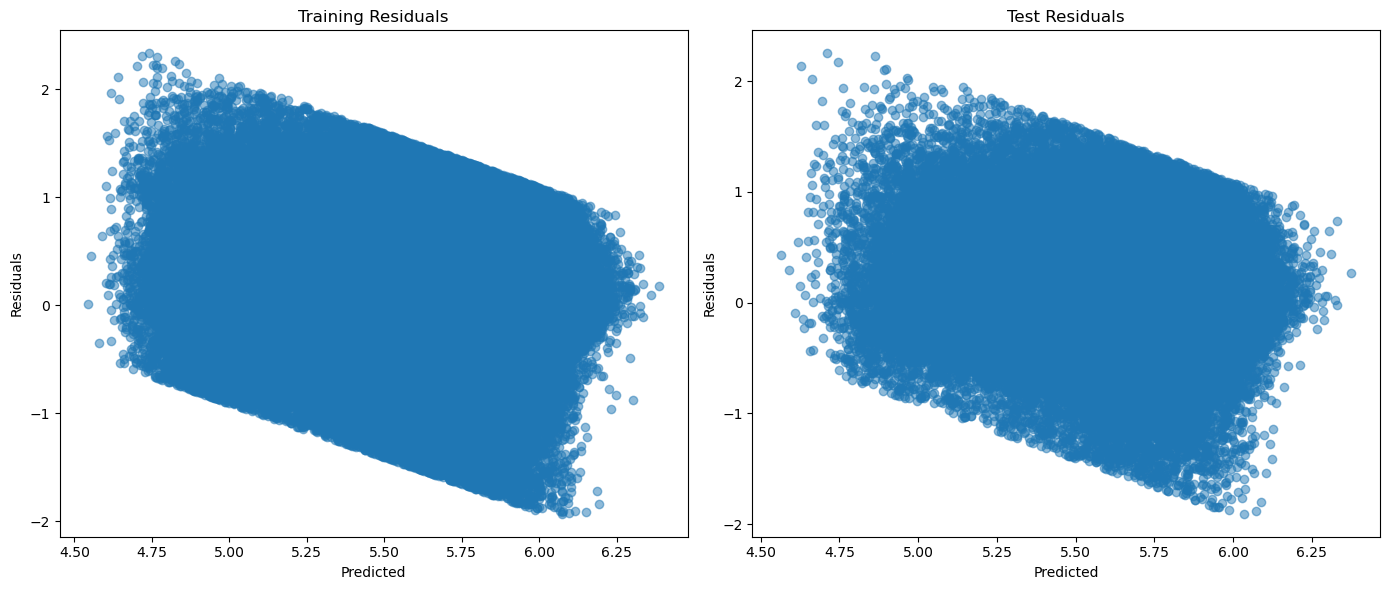

In [52]:
# Residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.title('Training Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.title('Test Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

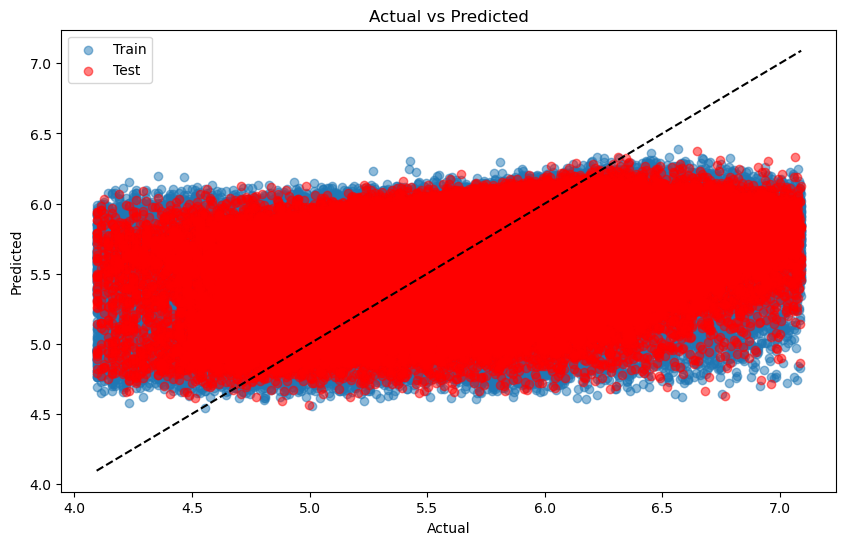

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test', color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### 4. XGBoost Model

In [80]:
model = xgb.XGBRegressor()



In [86]:
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred_train = model.predict(X_train)

In [92]:
y_pred_test = model.predict(X_test)

In [94]:
# Evaluating the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R²: {train_r2}')
print(f'Test R²: {test_r2}')

Training MSE: 0.1120386260875857
Test MSE: 0.11306704579074599
Training MAE: 0.2451064377952239
Test MAE: 0.24655474317735396
Training RMSE: 0.33472171439508625
Test RMSE: 0.3362544360908061
Training R²: 0.28707508430975415
Test R²: 0.2794928725138395


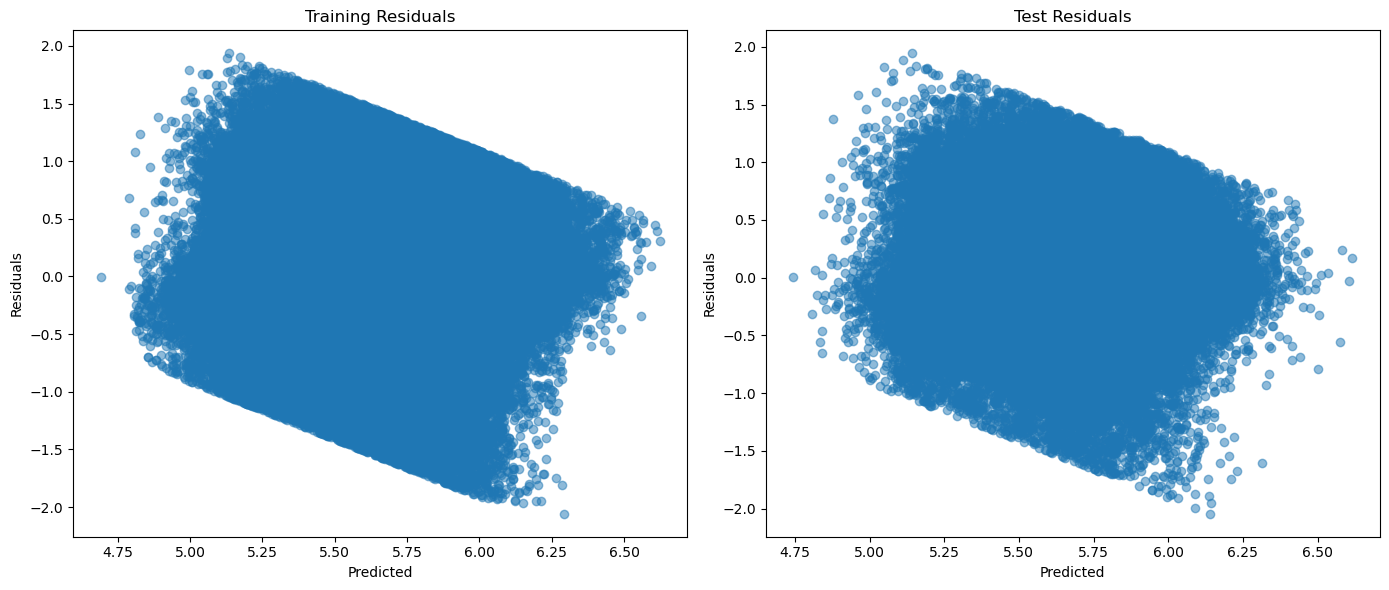

In [96]:
# Residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.title('Training Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.title('Test Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

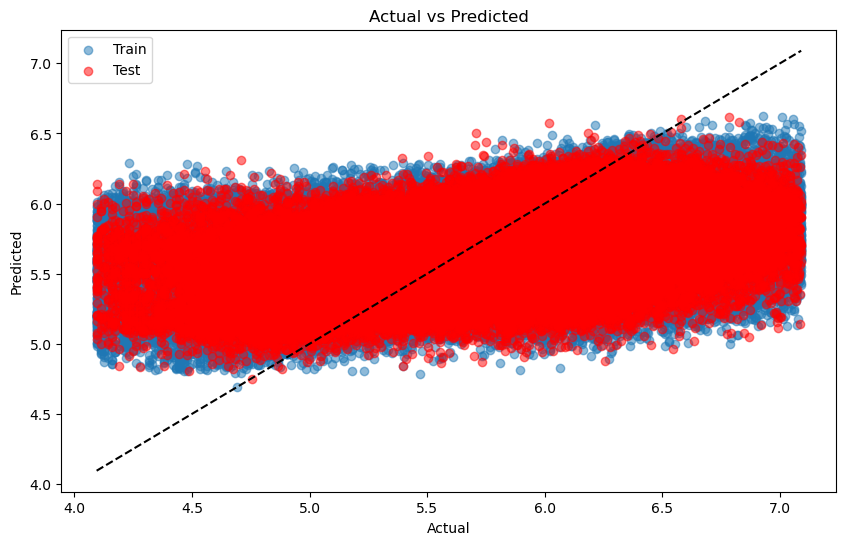

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test', color='red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()